回报函数  
$$G_t=R_t+\gamma R_{t+1}+\gamma^2 R_{t+2}+...=\sum\limits_{k=0}^{inf} \gamma^kR_{t+k}
\\=R_t+\gamma G_{t+1}$$
反过来算：  
$$G_{-2}=R_{-2}+\gamma G_{-1}
\\G_{-3}=R_{-3}+\gamma G_{-2}
\\.......
\\G_{t}=R_{t}+\gamma G_{t+1}$$


In [1]:
import numpy as np
np.random.seed(0)
# 定义状态转移概率矩阵P
P = [
    [0.9, 0.1, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.0, 0.4],
    [0.0, 0.0, 0.0, 0.0, 0.3, 0.7],
    [0.0, 0.2, 0.3, 0.5, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
]
P = np.array(P)

rewards = [-1, -2, -2, 10, 1, 0]  # 定义奖励函数
gamma = 0.5  # 定义折扣因子


# 给定一条序列,计算从某个索引（起始状态）开始到序列最后（终止状态）得到的回报
def compute_return(start_index, chain, gamma):
    G = 0
    for i in reversed(range(start_index, len(chain))):
        G = gamma * G + rewards[chain[i] - 1]
    return G


# 一个状态序列,s1-s2-s3-s6
chain = [1, 2, 3, 6]
start_index = 0
G = compute_return(start_index, chain, gamma)
print("根据本序列计算得到回报为：%s。" % G)

# 根据本序列计算得到回报为：-2.5。

根据本序列计算得到回报为：-2.5。


In [2]:
def compute(P, rewards, gamma, states_num):
    ''' 利用贝尔曼方程的矩阵形式计算解析解,states_num是MRP的状态数 '''
    rewards = np.array(rewards).reshape((-1, 1))  #将rewards写成列向量形式
    value = np.dot(np.linalg.inv(np.eye(states_num, states_num) - gamma * P),
                   rewards)
    return value


V = compute(P, rewards, gamma, 6)
print("MRP中每个状态价值分别为\n", V)

# MRP中每个状态价值分别为
#  [[-2.01950168]
#  [-2.21451846]
#  [ 1.16142785]
#  [10.53809283]
#  [ 3.58728554]
#  [ 0.        ]]

MRP中每个状态价值分别为
 [[-2.01950168]
 [-2.21451846]
 [ 1.16142785]
 [10.53809283]
 [ 3.58728554]
 [ 0.        ]]


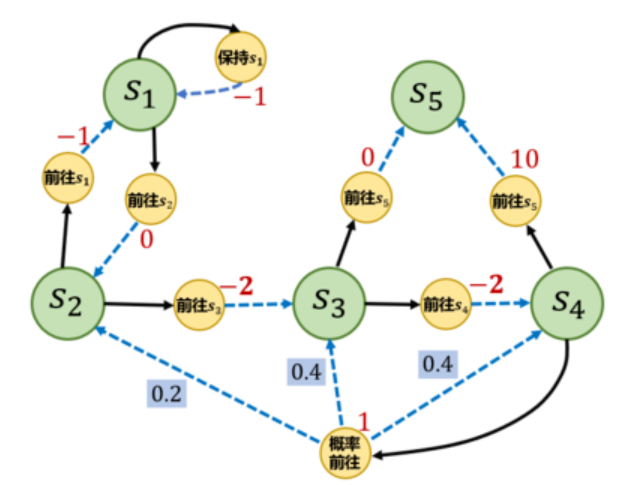

In [3]:
# 把输入的两个字符串通过“-”连接,便于使用上述定义的P、R变量
def join(str1, str2):
    return str1 + '-' + str2

S = ["s1", "s2", "s3", "s4", "s5"]  # 状态集合
A = ["保持s1", "前往s1", "前往s2", "前往s3", "前往s4", "前往s5", "概率前往"]  # 动作集合

# 策略1,随机策略
# 拼接S和A得到状态-动作对作为键,概率作为值
Pi_1 = {
    "s1-保持s1": 0.5,
    "s1-前往s2": 0.5,

    "s2-前往s1": 0.5,
    "s2-前往s3": 0.5,

    "s3-前往s4": 0.5,
    "s3-前往s5": 0.5,

    "s4-前往s5": 0.5,
    "s4-概率前往": 0.5,
}
# 策略2
Pi_2 = {
    "s1-保持s1": 0.6,
    "s1-前往s2": 0.4,

    "s2-前往s1": 0.3,
    "s2-前往s3": 0.7,

    "s3-前往s4": 0.5,
    "s3-前往s5": 0.5,
    
    "s4-前往s5": 0.1,
    "s4-概率前往": 0.9,
}

# 奖励函数
# 拼接S和A得到状态-动作对作为键,概率作为值
R = {
    "s1-保持s1": -1,
    "s1-前往s2": 0,

    "s2-前往s1": -1,
    "s2-前往s3": -2,

    "s3-前往s4": -2,
    "s3-前往s5": 0,

    "s4-前往s5": 10,
    "s4-概率前往": 1,
}

# 动作状态转移函数
# 拼接策略和状态作为键，查询转移概率
P = {
    "s1-保持s1-s1": 1.0,
    "s1-前往s2-s2": 1.0,

    "s2-前往s1-s1": 1.0,
    "s2-前往s3-s3": 1.0,

    "s3-前往s4-s4": 1.0,
    "s3-前往s5-s5": 1.0,
    
    "s4-前往s5-s5": 1.0,

    "s4-概率前往-s2": 0.2,
    "s4-概率前往-s3": 0.4,
    "s4-概率前往-s4": 0.4,
}

gamma = 0.5  # 折扣因子
MDP = (S, A, P, R, gamma)

In [4]:
gamma = 0.5
# 转化后的MRP的状态转移矩阵
P_from_mdp_to_mrp = [
    [0.5, 0.5, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.5, 0.5],
    [0.0, 0.1, 0.2, 0.2, 0.5],
    [0.0, 0.0, 0.0, 0.0, 1.0],
]
P_from_mdp_to_mrp = np.array(P_from_mdp_to_mrp)
R_from_mdp_to_mrp = [-0.5, -1.5, -1.0, 5.5, 0]

V = compute(P_from_mdp_to_mrp, R_from_mdp_to_mrp, gamma, 5)
print("MDP中每个状态价值分别为\n", V)

# MDP中每个状态价值分别为
#  [[-1.22555411]
#  [-1.67666232]
#  [ 0.51890482]
#  [ 6.0756193 ]
#  [ 0.        ]]

MDP中每个状态价值分别为
 [[-1.22555411]
 [-1.67666232]
 [ 0.51890482]
 [ 6.0756193 ]
 [ 0.        ]]


dict方法get与直接索引的区别  

    直接索引的问题：若字典中不存在键key，直接使用Pi[key]会抛出KeyError异常，导致程序崩溃。  

    .get()的解决方案：Pi.get(key, 0)在键不存在时返回默认值0，避免程序中断。  
    这在强化学习中尤为关键——策略Pi或奖励R可能未覆盖所有状态-动作对（如未探索的动作、新状态等）。  


In [5]:
def sample(MDP, Pi, timestep_max, number):
    ''' 采样函数,策略Pi,限制最长时间步timestep_max,总共采样序列数number '''
    S, A, P, R, gamma = MDP
    episodes = []
    for _ in range(number):
        episode = []
        timestep = 0
        s = S[np.random.randint(4)]  # 随机选择一个除s5以外的状态s作为起点
        # 当前状态为终止状态或者时间步太长时,一次采样结束
        while s != "s5" and timestep <= timestep_max:
            timestep += 1
            rand, temp = np.random.rand(), 0
            # 在0-1之间生成一个随机数，这个随机数落在的区间决定选择哪个动作
            # 如A[a1,a2,a3]->P[0.2,0.3,0.5]对应的区间分别是累计概率[(0~0.2),(0.2~0.5),(0.5~1.0)]
            # 在状态s下根据策略选择动作
            for a_opt in A:
                # 遍历动作集合
                # 由于每次的遍历顺序是一致的，概率累加表示的区间也是一致的
                temp += Pi.get(join(s, a_opt), 0)
                if temp > rand:
                # 累计概率表示的上一个动作区间不包括rand，而当前动作包括，则选择该动作
                    a = a_opt
                    r = R.get(join(s, a), 0)
                    break
            rand, temp = np.random.rand(), 0
            # 根据状态转移概率得到下一个状态s_next
            for s_opt in S:
                temp += P.get(join(join(s, a), s_opt), 0)
                if temp > rand:
                    s_next = s_opt
                    break
            episode.append((s, a, r, s_next))  # 把（s,a,r,s_next）元组放入序列中
            s = s_next  # s_next变成当前状态,开始接下来的循环
        episodes.append(episode)
    return episodes


# 采样5次,每个序列最长不超过1000步
episodes = sample(MDP, Pi_1, 20, 5)
print('第一条序列\n', episodes[0])
print('第二条序列\n', episodes[1])
print('第五条序列\n', episodes[4])

# 第一条序列
#  [('s1', '前往s2', 0, 's2'), ('s2', '前往s3', -2, 's3'), ('s3', '前往s5', 0, 's5')]
# 第二条序列
#  [('s4', '概率前往', 1, 's4'), ('s4', '前往s5', 10, 's5')]
# 第五条序列
#  [('s2', '前往s3', -2, 's3'), ('s3', '前往s4', -2, 's4'), ('s4', '前往s5', 10, 's5')]

第一条序列
 [('s1', '前往s2', 0, 's2'), ('s2', '前往s3', -2, 's3'), ('s3', '前往s5', 0, 's5')]
第二条序列
 [('s4', '概率前往', 1, 's4'), ('s4', '前往s5', 10, 's5')]
第五条序列
 [('s2', '前往s3', -2, 's3'), ('s3', '前往s4', -2, 's4'), ('s4', '前往s5', 10, 's5')]


$$G_{-2}=R_{-2}+\gamma G_{-1}   
\\(G_{-1}=R_{-1})
\\G_{-3}=R_{-3}+\gamma G_{-2}
\\.......
\\G_{t}=R_{t}+\gamma G_{t+1}$$
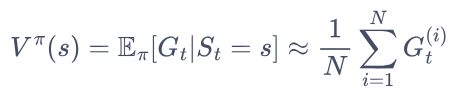  
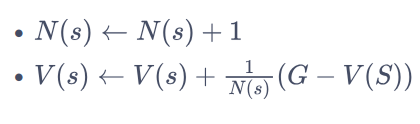  


In [6]:
# 对所有采样序列计算所有状态的价值
def MC(episodes, V, N, gamma):
    for episode in episodes:
        G = 0
        for i in range(len(episode) - 1, -1, -1):  #一个序列从后往前计算
            (s, a, r, s_next) = episode[i]
            G = r + gamma * G
            N[s] = N[s] + 1
            V[s] = V[s] + (G - V[s]) / N[s]


timestep_max = 20
# 采样1000次,可以自行修改
episodes = sample(MDP, Pi_1, timestep_max, 1000)
gamma = 0.5
V = {"s1": 0, "s2": 0, "s3": 0, "s4": 0, "s5": 0}
N = {"s1": 0, "s2": 0, "s3": 0, "s4": 0, "s5": 0}
MC(episodes, V, N, gamma)
print("使用蒙特卡洛方法计算MDP的状态价值为\n", V)

# 使用蒙特卡洛方法计算MDP的状态价值为
#  {'s1': -1.228923788722258, 's2': -1.6955696284402704, 's3': 0.4823809701532294,
# 's4': 5.967514743019431, 's5': 0}

使用蒙特卡洛方法计算MDP的状态价值为
 {'s1': -1.228923788722258, 's2': -1.6955696284402704, 's3': 0.4823809701532294, 's4': 5.967514743019431, 's5': 0}


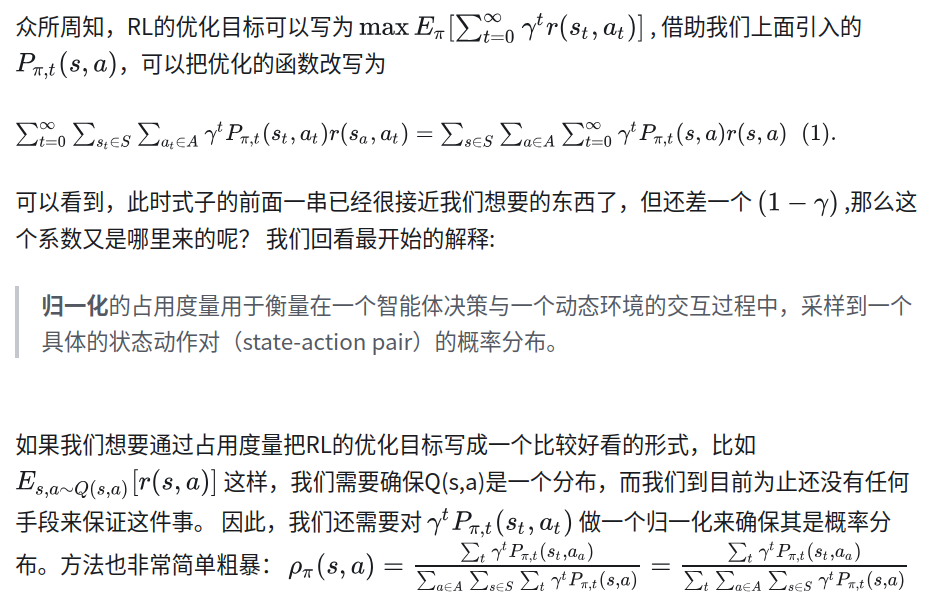  
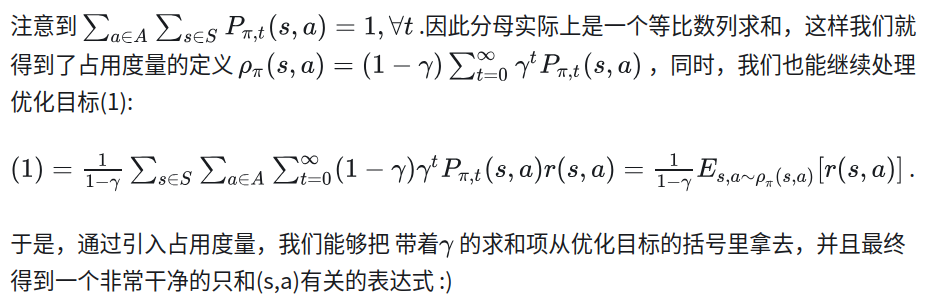  


In [7]:
def occupancy(episodes, s, a, timestep_max, gamma):
    ''' 计算状态动作对（s,a）出现的频率,以此来估算策略的占用度量 '''
    rho = 0
    total_times = np.zeros(timestep_max)  # 记录每个时间步t各被经历过几次
    occur_times = np.zeros(timestep_max)  # 记录(s_t,a_t)=(s,a)的次数
    for episode in episodes:
        for i in range(len(episode)):
            (s_opt, a_opt, r, s_next) = episode[i]
            total_times[i] += 1
            if s == s_opt and a == a_opt:
                occur_times[i] += 1
    for i in reversed(range(timestep_max)):
        if total_times[i]:
            rho += gamma**i * occur_times[i] / total_times[i]
    return (1 - gamma) * rho


gamma = 0.5
timestep_max = 1000

episodes_1 = sample(MDP, Pi_1, timestep_max, 1000)
episodes_2 = sample(MDP, Pi_2, timestep_max, 1000)
rho_1 = occupancy(episodes_1, "s4", "概率前往", timestep_max, gamma)
rho_2 = occupancy(episodes_2, "s4", "概率前往", timestep_max, gamma)
print(rho_1, rho_2)

# 0.112567796310472 0.23199480615618912

0.112567796310472 0.23199480615618912
